<a href="https://colab.research.google.com/github/ollin02/Challenge-Alura-Data-Scince-Sr-Juan/blob/main/Copia_de_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [6]:
import pandas as pd
from collections import defaultdict

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
ventas_tienda1 = list(tienda[['Producto','Precio']].itertuples(index=False, name=None))
ventas_tienda2 = list(tienda2[['Producto','Precio']].itertuples(index=False, name=None))
ventas_tienda3 = list(tienda3[['Producto','Precio']].itertuples(index=False, name=None))
ventas_tienda4 = list(tienda4[['Producto','Precio']].itertuples(index=False, name=None))

tupla_tienda1 = tuple(ventas_tienda1)
tupla_tienda2 = tuple(ventas_tienda2)
tupla_tienda3 = tuple(ventas_tienda3)
tupla_tienda4 = tuple(ventas_tienda4)

venta_total_tienda1 = sum([precio for producto, precio in tupla_tienda1])
venta_total_tienda2 = sum([precio for producto, precio in tupla_tienda2])
venta_total_tienda3 = sum([precio for producto, precio in tupla_tienda3])
venta_total_tienda4 = sum([precio for producto, precio in tupla_tienda4])


#lista de tiendas con facturación
tiendas_facturacion = [('tienda 1;',venta_total_tienda1), ('tienda 2:',venta_total_tienda2), ('tienda 3:',venta_total_tienda3), ('tienda 4:',venta_total_tienda4)]

print(tiendas_facturacion)

# Encontrar la tupla con el valor máximo (segundo elemento)
tienda_max = max(tiendas_facturacion, key=lambda x: x[1])

# Encontrar la tupla con el valor mínimo (segundo elemento)
tienda_min = min(tiendas_facturacion, key=lambda x: x[1])


print(f"Mayores ventas: {tienda_max[0]} con {tienda_max[1]}")
print(f"Menores ventas: {tienda_min[0]} con {tienda_min[1]}")


# Encabezados
print("{:<10} {:<15}".format("Tienda", "Ventas Totales"))
print("-" * 25)

# Filas de datos
for tienda, venta in tiendas_facturacion:
    print(tienda, venta)  # Formato con separadores de miles

print("-" * 25)

print('\n')


[('tienda 1;', 1150880400.0), ('tienda 2:', 1116343500.0), ('tienda 3:', 1098019600.0), ('tienda 4:', 1038375700.0)]
Mayores ventas: tienda 1; con 1150880400.0
Menores ventas: tienda 4: con 1038375700.0
Tienda     Ventas Totales 
-------------------------
tienda 1; 1150880400.0
tienda 2: 1116343500.0
tienda 3: 1098019600.0
tienda 4: 1038375700.0
-------------------------




# 2. Ventas por categoría

In [3]:

def analizar_categorias(df: pd.DataFrame, columna: str, mostrar_resultados: bool = True) -> dict:
    """
    Analiza las categorías de una columna en un DataFrame, mostrando:
    - Lista de categorías únicas
    - Cantidad total de categorías
    - Frecuencia de cada categoría

    Args:
        df (pd.DataFrame): DataFrame a analizar
        columna (str): Nombre de la columna categórica
        mostrar_resultados (bool): Mostrar output en consola

    Returns:
        dict: Diccionario con frecuencias {categoría: cantidad}
    """
    # Obtener datos directamente con pandas (más eficiente)
    serie_categorias = df[columna]

    # Obtener valores únicos y conteo
    categorias_unicas = serie_categorias.unique().tolist()
    frecuencias = serie_categorias.value_counts().to_dict()

    if mostrar_resultados:
        # Mostrar categorías únicas y cantidad
        print(f"\nCategorías únicas ({len(categorias_unicas)}):")
        print(categorias_unicas, '\n')

        # Mostrar frecuencias
        print("Frecuencia de categorías:")
        for cat, cant in frecuencias.items():
            print(f"- {cat}: {cant} productos")

    return frecuencias

def calcular_promedio_calificacion(df: pd.DataFrame, columna: str, mostrar_resultados: bool = True) -> dict:
    """
    Calcula el promedio de una columna específica en un DataFrame y muestra opcionalmente el resultado.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        columna (str): Nombre de la columna para calcular el promedio.
        mostrar_resultados (bool, optional): Si es True, imprime el resultado. Por defecto True.

    Returns:
        dict: Diccionario con el promedio calculado.
    """
    promedio = df[columna].mean()
    resultados = {'promedio': promedio}

    if mostrar_resultados:
        print(f"El promedio de la columna '{columna}' es: {promedio:.2f}")

    return resultados


In [7]:
# Para un DataFrame 'tienda' y columna 'Categoría del Producto'
print("**************************Tienda1******************************")
resultados = analizar_categorias(tienda, 'Categoría del Producto')
print("\n**************************Tienda2******************************")
resultados2 = analizar_categorias(tienda2, 'Categoría del Producto')
print("\n**************************Tienda3******************************")
resultados3 = analizar_categorias(tienda3, 'Categoría del Producto')
print("\n**************************Tienda4******************************")
resultados4 = analizar_categorias(tienda4, 'Categoría del Producto')


**************************Tienda1******************************

Categorías únicas (8):
['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Artículos para el hogar', 'Deportes y diversión', 'Libros', 'Instrumentos musicales'] 

Frecuencia de categorías:
- Muebles: 465 productos
- Electrónicos: 448 productos
- Juguetes: 324 productos
- Electrodomésticos: 312 productos
- Deportes y diversión: 284 productos
- Instrumentos musicales: 182 productos
- Libros: 173 productos
- Artículos para el hogar: 171 productos

**************************Tienda2******************************

Categorías únicas (8):
['Muebles', 'Instrumentos musicales', 'Deportes y diversión', 'Electrónicos', 'Artículos para el hogar', 'Juguetes', 'Electrodomésticos', 'Libros'] 

Frecuencia de categorías:
- Muebles: 442 productos
- Electrónicos: 422 productos
- Juguetes: 313 productos
- Electrodomésticos: 305 productos
- Deportes y diversión: 275 productos
- Instrumentos musicales: 224 productos
- Libros: 197 prod

# 3. Calificación promedio de la tienda


In [8]:
print("**************************Tienda1******************************")
# Acceder a los datos programáticamente
print("\nCategoría con más ventas es", max(resultados, key=resultados.get), "y la cantidad vendida fue cantidad: ", resultados[max(resultados, key=resultados.get)])
print("Categoría con menos ventas es", min(resultados, key=resultados.get), "y la cantidad vendida fue cantidad: ", resultados[min(resultados, key=resultados.get)])

# Para un DataFrame 'tienda2' y columna 'Categoría del Producto'
print("\n**************************Tienda2******************************")
# Acceder a los datos programáticamente
print("\nCategoría con más ventas es", max(resultados2, key=resultados2.get), "y la cantidad vendida fue cantidad: ", resultados2[max(resultados2, key=resultados2.get)])
print("Categoría con menos ventas es", min(resultados2, key=resultados2.get), "y la cantidad vendida fue cantidad: ", resultados2[min(resultados2, key=resultados2.get)])

# Para un DataFrame 'tienda' y columna 'Categoría del Producto'
print("\n**************************Tienda3******************************")
# Acceder a los datos programáticamente
print("\nCategoría con más ventas es", max(resultados3, key=resultados3.get), "y la cantidad vendida fue cantidad: ", resultados3[max(resultados3, key=resultados3.get)])
print("Categoría con menos ventas es", min(resultados3, key=resultados3.get), "y la cantidad vendida fue cantidad: ", resultados3[min(resultados3, key=resultados3.get)])


# Para un DataFrame 'tienda' y columna 'Categoría del Producto'
print("\n**************************Tienda4******************************")
# Acceder a los datos programáticamente
print("\nCategoría con más ventas es", max(resultados4, key=resultados4.get), "y la cantidad vendida fue cantidad: ", resultados4[max(resultados4, key=resultados4.get)])
print("Categoría con menos ventas es", min(resultados4, key=resultados4.get), "y la cantidad vendida fue cantidad: ", resultados4[min(resultados4, key=resultados4.get)])

**************************Tienda1******************************

Categoría con más ventas es Muebles y la cantidad vendida fue cantidad:  465
Categoría con menos ventas es Artículos para el hogar y la cantidad vendida fue cantidad:  171

**************************Tienda2******************************

Categoría con más ventas es Muebles y la cantidad vendida fue cantidad:  442
Categoría con menos ventas es Artículos para el hogar y la cantidad vendida fue cantidad:  181

**************************Tienda3******************************

Categoría con más ventas es Muebles y la cantidad vendida fue cantidad:  499
Categoría con menos ventas es Instrumentos musicales y la cantidad vendida fue cantidad:  177

**************************Tienda4******************************

Categoría con más ventas es Muebles y la cantidad vendida fue cantidad:  480
Categoría con menos ventas es Instrumentos musicales y la cantidad vendida fue cantidad:  170


In [9]:
print("**************************Tienda1******************************")
promedio_tienda1 = calcular_promedio_calificacion(tienda, 'Calificación')
print("\n**************************Tienda2******************************")
promedio_tienda2 = calcular_promedio_calificacion(tienda2, 'Calificación')
print("\n**************************Tienda3******************************")
promedio_tienda3 = calcular_promedio_calificacion(tienda3, 'Calificación')
print("\n**************************Tienda4******************************")
promedio_tienda4 = calcular_promedio_calificacion(tienda4, 'Calificación')


**************************Tienda1******************************
El promedio de la columna 'Calificación' es: 3.98

**************************Tienda2******************************
El promedio de la columna 'Calificación' es: 4.04

**************************Tienda3******************************
El promedio de la columna 'Calificación' es: 4.05

**************************Tienda4******************************
El promedio de la columna 'Calificación' es: 4.00


# 4. Productos más y menos vendidos

In [11]:
# Para un DataFrame 'tienda' y columna 'Producto'
print("**************************Tienda1******************************")
productos_portienda = analizar_categorias(tienda, 'Producto')
print("**************************Tienda2******************************")
productos_portienda2 = analizar_categorias(tienda2, 'Producto')
print("**************************Tienda3******************************")
productos_portienda3 = analizar_categorias(tienda3, 'Producto')
print("**************************Tienda4******************************")
productos_portienda4 = analizar_categorias(tienda4, 'Producto')


**************************Tienda1******************************

Categorías únicas (51):
['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina', 'Bloques de construcción', 'Muñeca bebé', 'Lavavajillas', 'Lavadora de ropa', 'Carrito de control remoto', 'Refrigerador', 'Auriculares', 'Olla de presión', 'Bicicleta', 'Ciencia de datos con Python', 'Balón de voleibol', 'Ajedrez de madera', 'TV LED UHD 4K', 'Vaso térmico', 'Kit de bancas', 'Dashboards con Power BI', 'Cubertería', 'Set de ollas', 'Batería', 'Cuerda para saltar', 'Estufa', 'Cama box', 'Impresora', 'Mesa de noche', 'Armario', 'Dinosaurio Rex', 'Guitarra eléctrica', 'Secadora de ropa', 'Sofá reclinable', 'Tablet ABXY', 'Cubo mágico 8x8', 'Set de vasos', 'Modelado predictivo', 'Iphone 15', 'Mochila', 'Balón de baloncesto', 'Auriculares con micrófono', 'Sillón', 'Guitarra acústica', 'Iniciando en programación', 'Celular ABXY', 'Smartwatch', 'Mesa de centro', 'Cama king', 'Smart TV', 'Pandereta']

In [12]:
print("**************************Tienda1******************************")
# Acceder a los datos programáticamente
print("\nEl producto con más ventas es:", max(productos_portienda, key=productos_portienda.get), "y la cantidad máxima de número de ventas: ", productos_portienda[max(productos_portienda, key=productos_portienda.get)])
print("El producto con menos ventas es:", min(productos_portienda, key=productos_portienda.get), "y la cantidad minima de número de ventas: ", productos_portienda[min(productos_portienda, key=productos_portienda.get)])

print("\n**************************Tienda2******************************")
# Acceder a los datos programáticamente
print("\nEl producto con más ventas es:", max(productos_portienda2, key=productos_portienda2.get), "y la cantidad máxima de número de ventas: ", productos_portienda2[max(productos_portienda2, key=productos_portienda2.get)])
print("El producto con menos ventas es:", min(productos_portienda2, key=productos_portienda2.get), "y la cantidad minima de número de ventas: ", productos_portienda2[min(productos_portienda2, key=productos_portienda2.get)])

print("\n**************************Tienda3******************************")
# Acceder a los datos programáticamente
print("\nEl producto con más ventas es:", max(productos_portienda3, key=productos_portienda3.get), "y la cantidad máxima de número de ventas: ", productos_portienda3[max(productos_portienda3, key=productos_portienda3.get)])
print("El producto con menos ventas es:", min(productos_portienda3, key=productos_portienda3.get), "y la cantidad minima de número de ventas: ", productos_portienda3[min(productos_portienda3, key=productos_portienda3.get)])

print("\n**************************Tienda4******************************")
# Acceder a los datos programáticamente
print("\nEl producto con más ventas es:", max(productos_portienda4, key=productos_portienda4.get), "y la cantidad máxima de número de ventas: ", productos_portienda4[max(productos_portienda4, key=productos_portienda4.get)])
print("El producto con menos ventas es:", min(productos_portienda4, key=productos_portienda4.get), "y la cantidad minima de número de ventas: ", productos_portienda4[min(productos_portienda4, key=productos_portienda4.get)])


**************************Tienda1******************************

El producto con más ventas es: Microondas y la cantidad máxima de número de ventas:  60
El producto con menos ventas es: Auriculares con micrófono y la cantidad minima de número de ventas:  33

**************************Tienda2******************************

El producto con más ventas es: Iniciando en programación y la cantidad máxima de número de ventas:  65
El producto con menos ventas es: Juego de mesa y la cantidad minima de número de ventas:  32

**************************Tienda3******************************

El producto con más ventas es: Kit de bancas y la cantidad máxima de número de ventas:  57
El producto con menos ventas es: Bloques de construcción y la cantidad minima de número de ventas:  35

**************************Tienda4******************************

El producto con más ventas es: Cama box y la cantidad máxima de número de ventas:  62
El producto con menos ventas es: Guitarra eléctrica y la cantidad mi

# 5. Envío promedio por tienda

In [13]:
print("**************************Tienda1******************************")
costo_promedio_envio_tienda1 = calcular_promedio_calificacion(tienda, 'Costo de envío')
print("\n**************************Tienda2******************************")
costo_promedio_envio_tienda1 = calcular_promedio_calificacion(tienda2, 'Costo de envío')
print("\n**************************Tienda3******************************")
costo_promedio_envio_tienda1 = calcular_promedio_calificacion(tienda3, 'Costo de envío')
print("\n**************************Tienda4******************************")
costo_promedio_envio_tienda1 = calcular_promedio_calificacion(tienda4, 'Costo de envío')


**************************Tienda1******************************
El promedio de la columna 'Costo de envío' es: 26018.61

**************************Tienda2******************************
El promedio de la columna 'Costo de envío' es: 25216.24

**************************Tienda3******************************
El promedio de la columna 'Costo de envío' es: 24805.68

**************************Tienda4******************************
El promedio de la columna 'Costo de envío' es: 23459.46


# 6. Generando gáfico

Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

No es necesario mostrar una visualización en cada paso, pero al final del análisis debes generar los gráficos que consideres más útiles para interpretar los datos.

Consejo: Matplotlib ofrece una variedad de tipos de gráficos que son fáciles de implementar, lo que lo convierte en una excelente opción para principiantes. Utilice su creatividad para elegir los gráficos que mejor resalten las tendencias y los conocimientos de su a

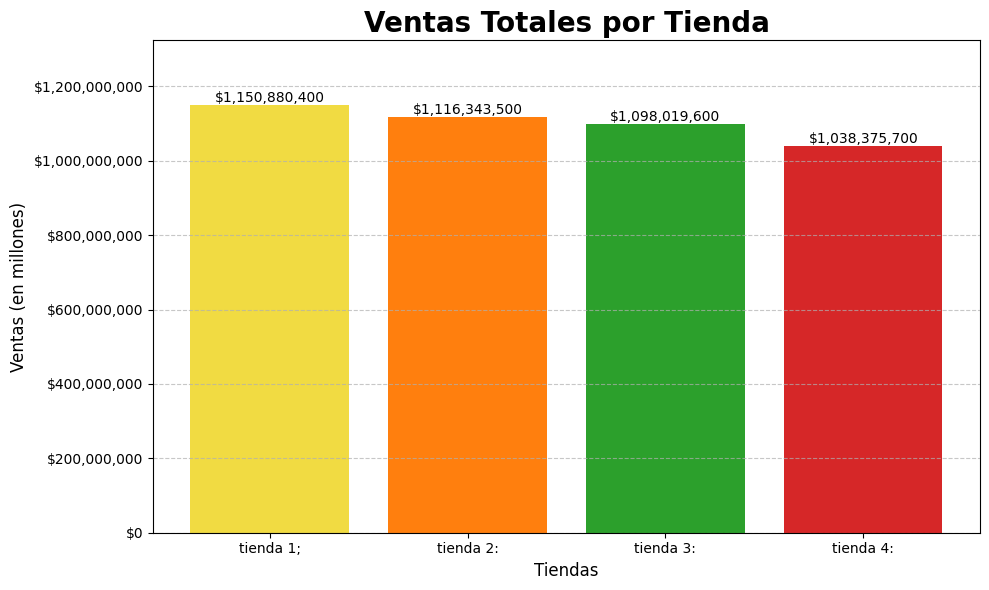

In [15]:
import matplotlib.pyplot as plt

# Separar los datos en dos listas
nombres = [tienda[0] for tienda in tiendas_facturacion]
ventas = [tienda[1] for tienda in tiendas_facturacion]

# Configurar el gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(nombres, ventas, color='skyblue')
colores = ['#f1db42', '#ff7f0e', '#2ca02c', '#d62728']

# Personalizar el gráfico
plt.title('Ventas Totales por Tienda', fontsize=20, fontweight='bold')
plt.bar(nombres, ventas, color=colores)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ventas (en millones)', fontsize=12)
plt.ylim(0, max(ventas) * 1.15)
plt.xticks(rotation=0, ha='center')  # Rotar etiquetas para mejor lectura

# Formatear los valores del eje Y con separadores de miles
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir etiquetas de valor en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

# Añadir grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout automáticamente
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Guardar el gráfico
# plt.savefig('ventas_tiendas.png', dpi=300)

##Gráfico de columnas de ventas totales por tienda

Este grafico no solo facilita identificar la tienda con mejor rendimiento, sino que también resalta posibles áreas de mejora en otras tiendas. Por ejemplo, al observar las métricas de la Tienda 1, se pueden establecer puntos de referencia claros para incrementar los ingresos de las demás ubicaciones. Comparar visualmente estos resultados permite al Sr. Juan priorizar estrategias específicas de crecimiento y eficiencia, basadas en el desempeño actual.

{'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}


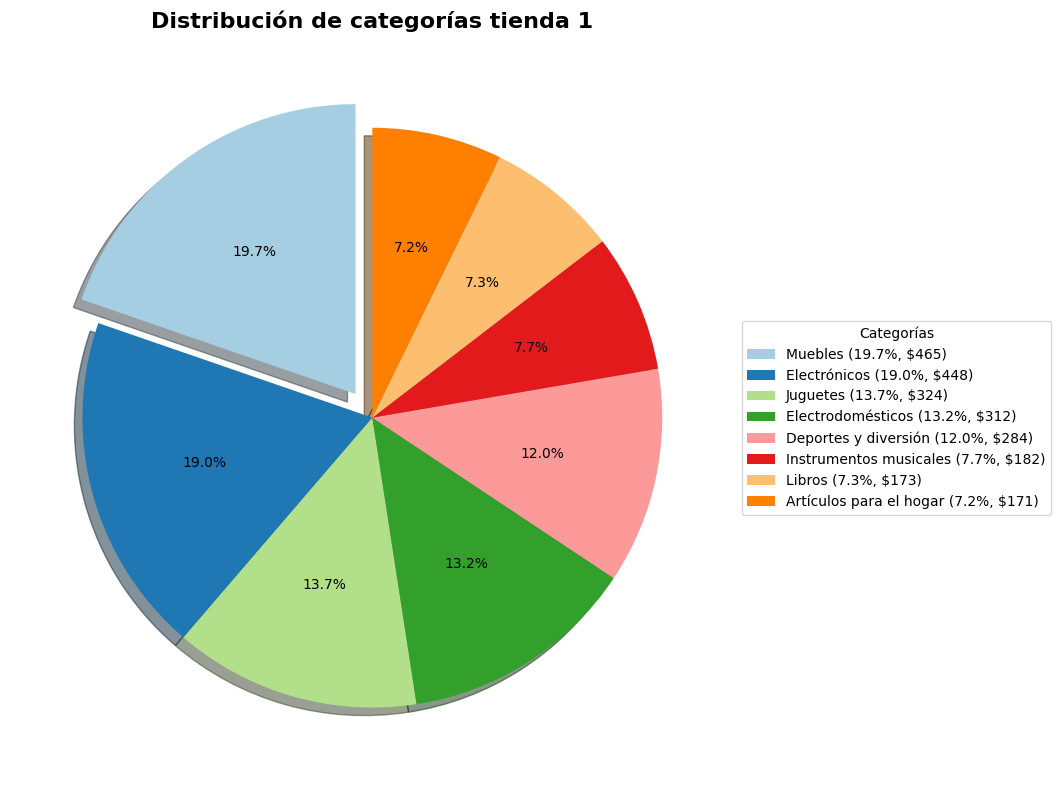

In [16]:
import matplotlib.pyplot as plt

# Datos de ejemplo
print(resultados)
# Ordenar los datos de mayor a menor
sorted_items = sorted(resultados.items(), key=lambda x: x[1], reverse=True)
categorias = [item[0] for item in sorted_items]
valores = [item[1] for item in sorted_items]

# Configurar el gráfico
plt.figure(figsize=(12, 8))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)  # Resaltar la categoría más grande

# Crear el gráfico de pastel
wedges, texts, autotexts = plt.pie(
    valores,
    labels=None,  # Quitamos las etiquetas directas (usaremos leyenda)
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 10}
)

# Añadir leyenda con porcentajes y valores
leyenda = [
    f"{categoria} ({porcentaje}, ${valor:,})"
    for categoria, valor, porcentaje in zip(
        categorias,
        valores,
        [f"{p.get_text()}" for p in autotexts]
    )
]

plt.legend(
    wedges,
    leyenda,
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Título y ajustes
plt.title("Distribución de categorías tienda 1", fontsize=16, pad=20, fontweight='bold')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Guardar el gráfico
# plt.savefig('grafico_pastel.png', dpi=300, bbox_inches='tight')

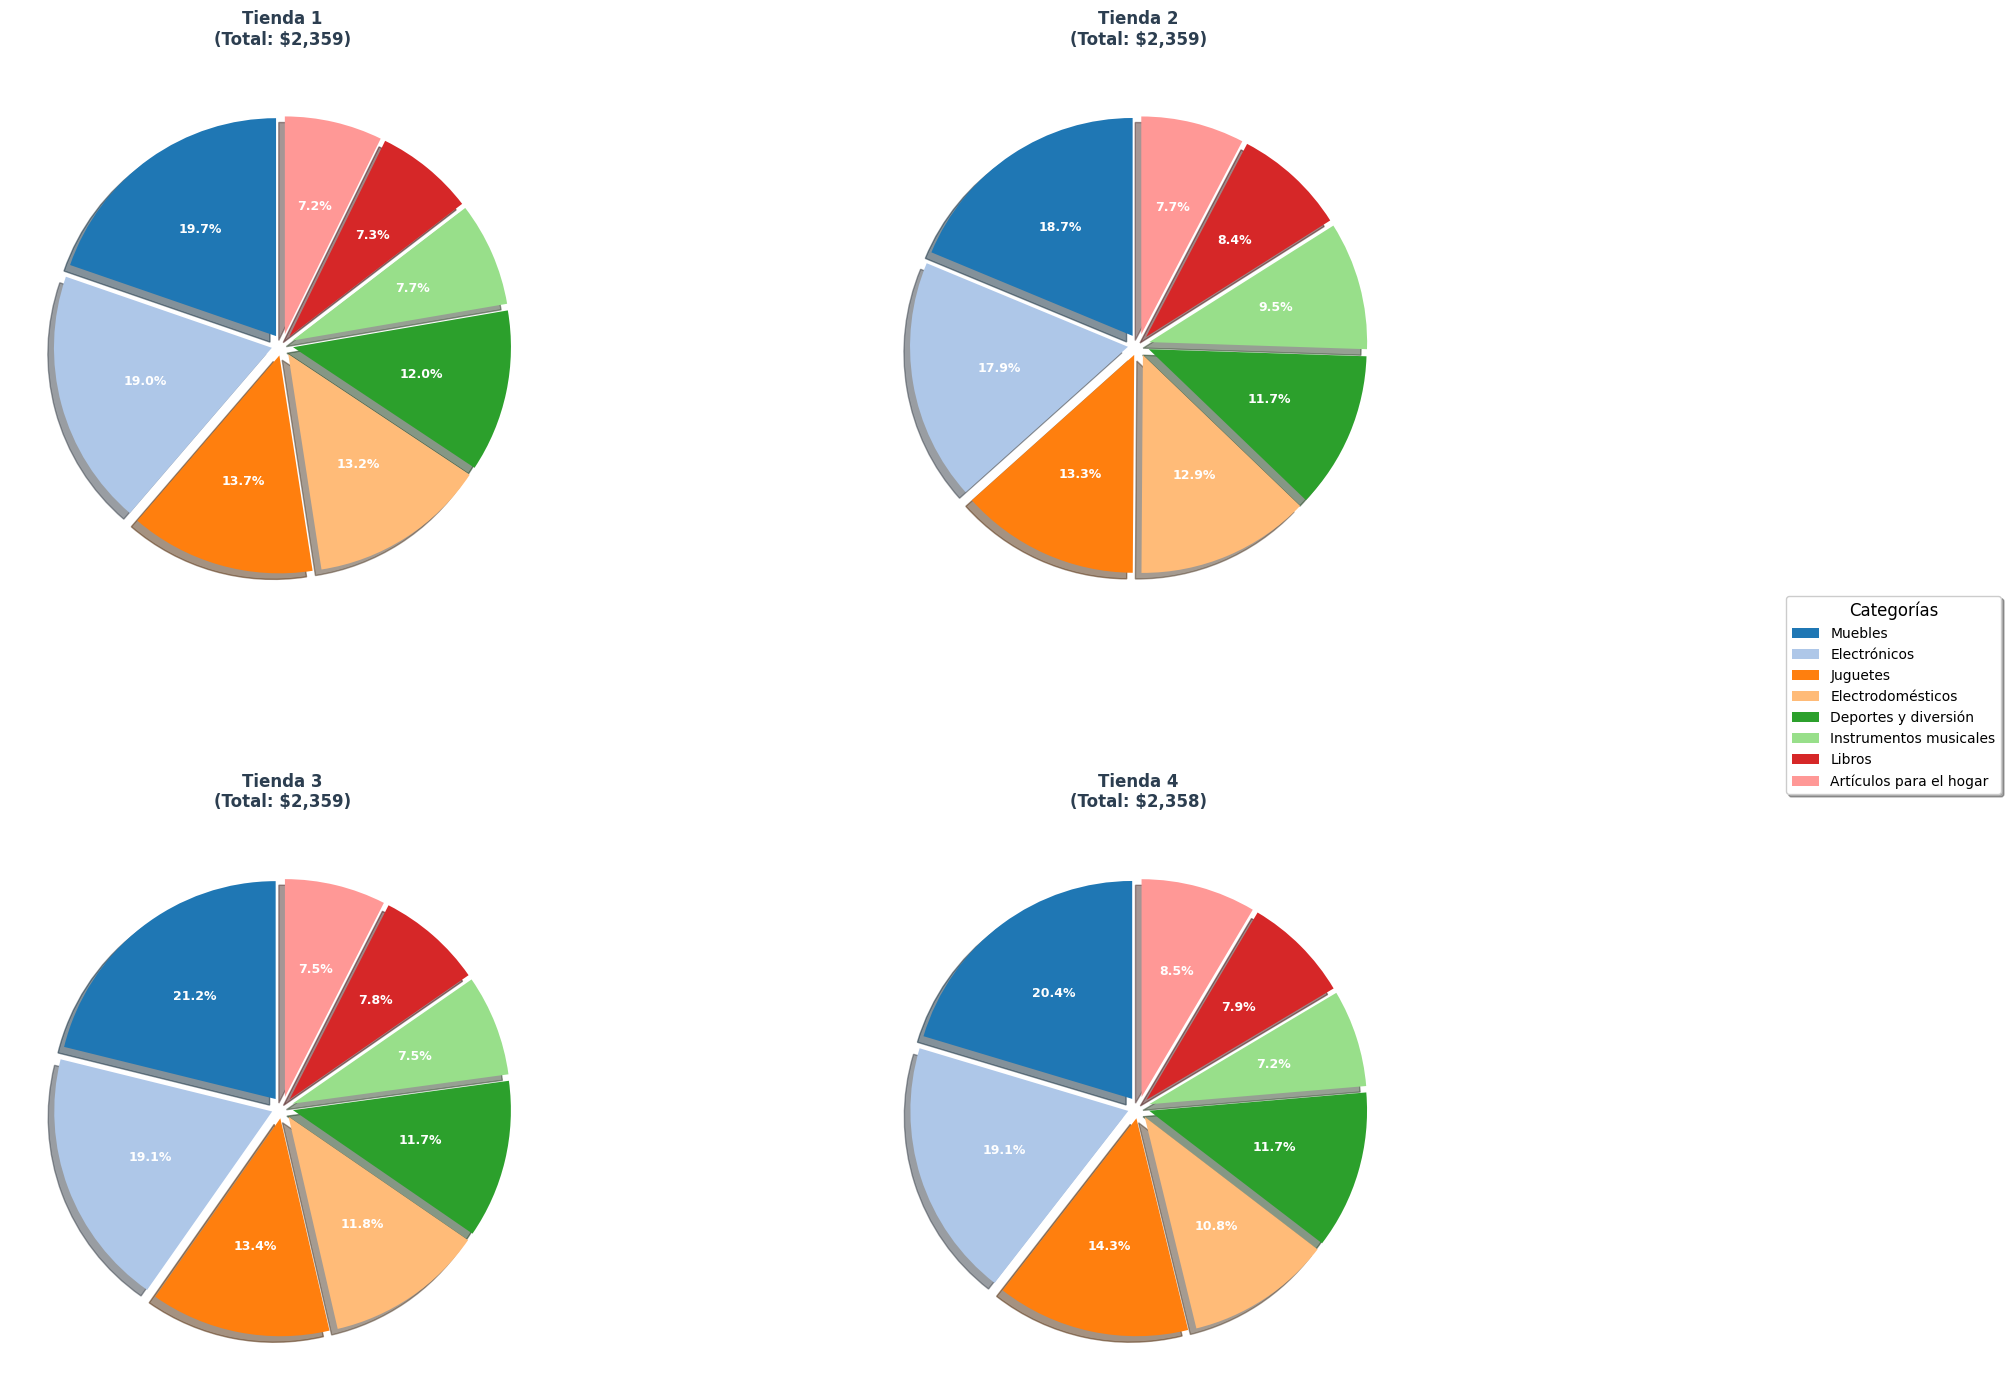

In [17]:
import matplotlib.pyplot as plt

# Datos
resultados = {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}
resultados2 = {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}
resultados3 = {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Instrumentos musicales': 177, 'Artículos para el hogar': 177}
resultados4 = {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}

datos = [resultados, resultados2, resultados3, resultados4]

# Configuración común
categorias = list(resultados.keys())  # Orden fijo para colores consistentes
colores = plt.cm.tab20.colors[:len(categorias)]  # Paleta profesional
explode = [0.05] * len(categorias)  # Separación sutil entre todas las porciones

# Crear figura
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
axs = axs.flatten()

# Generar cada gráfico
for i, (ax, data) in enumerate(zip(axs, datos)):
    valores = [data[cat] for cat in categorias]
    total = sum(valores)

    # Gráfico de pastel
    wedges, texts, autotexts = ax.pie(
        valores,
        labels=None,
        colors=colores,
        autopct=lambda p: f'{p:.1f}%' if p >= 3 else '',  # Filtrar porcentajes pequeños
        startangle=90,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 9, 'fontweight': 'bold', 'color': 'white'}
    )

    # Título con estilo profesional
    ax.set_title(
        f'Tienda {i+1}\n(Total: ${total:,})',
        fontsize=12,
        fontweight='bold',
        color='#2C3E50',
        pad=20
    )

# Leyenda unificada
fig.legend(
    wedges,
    categorias,
    title='Categorías',
    loc='center right',
    bbox_to_anchor=(1.15, 0.5),
    title_fontsize=12,
    fontsize=10,
    frameon=True,
    shadow=True
)

# Ajustar diseño
plt.tight_layout()
plt.subplots_adjust(right=0.85, wspace=0.3, hspace=0.4)  # Espaciado entre gráficos

# Guardar en alta calidad (opcional)
plt.savefig('comparacion_pasteles.png', dpi=300, bbox_inches='tight')

plt.show()

##Gráfico de pastel para distribución de categorías de productos

Para visualizar la distribución de categorías de productos en cada tienda, se sugiere crear un gráfico de pastel para cada ubicación. Estos gráficos permiten identificar rápidamente cuál es la categoría predominante y cuál es la menos vendida en cada tienda.

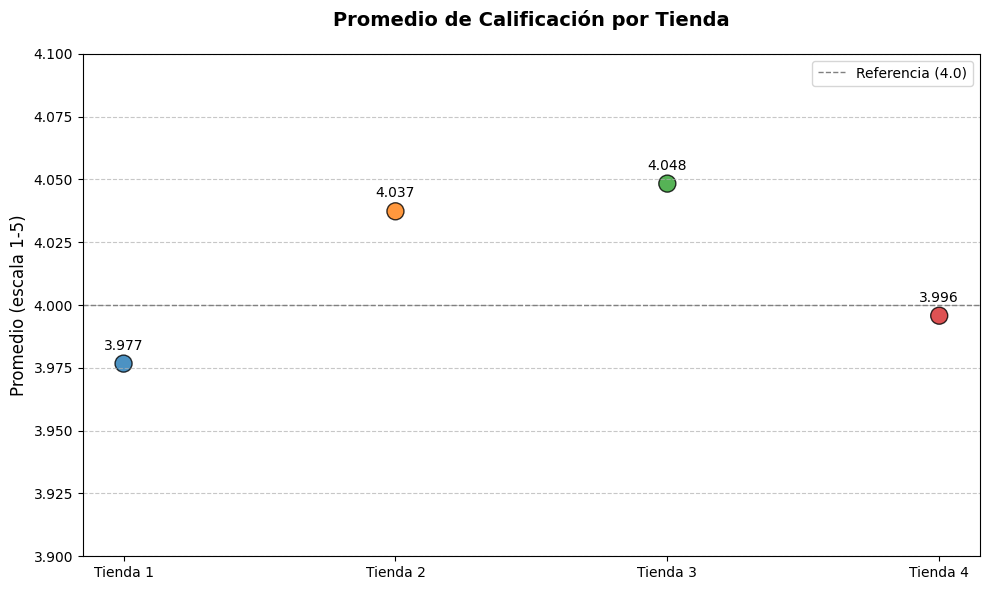

In [18]:
# Datos
promedio_tienda1 = {'promedio': 3.976685036032217}
promedio_tienda2 = {'promedio': 4.037303942348453}
promedio_tienda3 = {'promedio': 4.048325561678677}
promedio_tienda4 = {'promedio': 3.9957591178965224}

# Extraer valores y etiquetas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios = [
    promedio_tienda1['promedio'],
    promedio_tienda2['promedio'],
    promedio_tienda3['promedio'],
    promedio_tienda4['promedio']
]

# Configurar el gráfico
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=tiendas,
    y=promedios,
    s=150,  # Tamaño de los puntos
    c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # Colores personalizados
    edgecolors='black',
    alpha=0.8
)

# Personalización avanzada
plt.title('Promedio de Calificación por Tienda', fontsize=14, pad=20, fontweight='bold')
plt.ylabel('Promedio (escala 1-5)', fontsize=12)
plt.ylim(3.9, 4.1)  # Zoom en el rango relevante
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir valores exactos como anotaciones
for i, (tienda, promedio) in enumerate(zip(tiendas, promedios)):
    plt.annotate(
        f'{promedio:.3f}',
        (i, promedio),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=10,
        color='black'
    )

# Añadir línea de referencia
plt.axhline(y=4.0, color='gray', linestyle='--', linewidth=1, label='Referencia (4.0)')
plt.legend()

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Opcional: Guardar en alta resolución
# plt.savefig('promedio_tiendas.png', dpi=300, bbox_inches='tight')

##Gráfico de dispersión para mostrar la calificación promedio por tienda

La representación visual, como gráficos de dispersión o tablas comparativas, ayuda a identificar rápidamente cuáles tiendas obtienen mejores opiniones de los clientes y cuáles presentan áreas críticas de insatisfacción. Cruzar estos datos con las categorías de productos predominantes puede revelar patrones importantes, como si las tiendas con mayor satisfacción están especializadas en ciertas categorías o si los tiempos de envío afectan directamente la percepción del cliente. Este nivel de análisis profundizado facilita decisiones estratégicas más sólidas.


##Introducción

Este informe tiene como propósito revisar los datos de ventas de cuatro tiendas diferentes para determinar cuál ofrece la mejor opción comercial para el Sr. Juan, quien desea vender sus productos en el lugar más adecuado. En este análisis, se tuvieron en cuenta varios aspectos importantes: los ingresos totales de cada tienda, los productos que se venden mejor y peor, las categorías más relevantes, las calificaciones de los clientes y los costos de envío promedio. La idea es ofrecer una recomendación basada en datos y gráficos que respalden los resultados.

###Análisis y Recomendaciones para el Sr. Juan:

Basándonos en los datos proporcionados, se evalúan los siguientes aspectos clave para determinar qué tienda es la menos eficiente y, por lo tanto, la candidata ideal para vender:

####1. Ventas Totales
- Tienda 1: $1,150,880,400 (Líder en ventas).

- Tienda 4: $1,038,375,700 (Último lugar, 12% menos que Tienda 1).

Observación: Aunque la Tienda 1 lidera en ventas, la Tienda 4 muestra el desempeño más débil en ingresos brutos, lo que la posiciona como la menos rentable en términos absolutos.

####2. Desempeño por Categorías
-- Categoría más vendida (Muebles):

- Tienda 3 lidera con 499 unidades, demostrando fortaleza en productos clave.

- Tienda 4 vende 480 unidades, un 3.8% menos que la Tienda 3.

-- Categoría menos vendida:

-Tienda 4 tiene el peor desempeño en Instrumentos musicales (170 unidades), incluso por debajo de la Tienda 3 (177 unidades).

Observación: La Tienda 4 no solo está rezagada en ventas totales, sino también en categorías críticas como Instrumentos musicales.

#### 3. Satisfacción del Cliente (Calificaciones)
- Tienda 3: 4.05/5 (Máxima calificación, refleja alta satisfacción).

- Tienda 4: 4.00/5 (Competitiva, pero inferior a Tiendas 2 y 3).

- Tienda 1: 3.98/5 (La más baja, riesgo para reputación).

Observación: Aunque la Tienda 4 tiene una calificación decente, no compensa su bajo rendimiento en ventas.

####4. Ventas por Producto
-- Producto más vendido:

- Tienda 4 destaca con Cama box (62 unidades), pero su producto menos vendido (Guitarra eléctrica, 33 unidades) muestra una brecha del 47% entre éxito y fracaso.

-- Comparación:

- Tienda 3 tiene una brecha menor (57 unidades vs. 35 unidades).

Riesgo: La Tienda 4 depende excesivamente de un solo producto exitoso, lo que la hace vulnerable.

####5. Costos de Envío
- Tienda 4: $23,459.46 (Costos más bajos, pero no compensan las ventas bajas).

- Tienda 1: $26,018.61 (Costos altos, aunque justificados por mayores ingresos).

Observación: Aunque la Tienda 4 gestiona mejor sus costos, esto no se traduce en rentabilidad superior.

###Recomendación Final
Vender la Tienda 4.

Razones principales:

1. Menores ventas totales (1,038M vs. 1,150M de Tienda 1).

2. Bajo desempeño en categorías clave (Instrumentos musicales y brecha de productos).

3. Calificación competitiva pero no destacada (4.00 vs. 4.05 de Tienda 3).

4. Aunque tiene costos bajos, no logra traducirlos en ventas significativas.

Estrategia post-venta:

- Invertir en Tienda 3 (alto potencial) y optimizar Tienda 1 (mejorar calificaciones).

¡Este enfoque maximizará el valor del emprendimiento futuro del Sr. Juan!
